In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Constants
gd = 0.857438             #nuclear magnetic moment of deuterium
gs = 2.002319             #electron spin g-factor
gp = 5.585694             #proton spin g-factor
me = 9.1093837 * 10**-31  #mass of electron [kg]
mp = 1.6726219 * 10**-27  #mass of proton [kg]
au = 6.57968 * 10**9      #conversion factor to [MHz]
alpha = 1 / 137           #fine-structure constant
ub = 1.399624             #Bohr magneton [MHz / Gauss]
un = ub * (me / mp)       #nuclear Bohr magneton [MHz / Gauss]
a = (2 / 3) * gd * gs * (alpha**2) * (me / mp) * au

In [3]:
#Defining a function to calculate the first-order hyperfine-structure energy shifts
def deltaE1_hfs(i, s, f):
    IdotS = (f * (f + 1) - i * (i + 1) - s * (s + 1)) / 2
    return round(a * IdotS, 3)

#Defining a function to calculate the first-order Zeeman effect energy shifts
def deltaE1_zeeman(f, mf, B0):
    k1 = gs * ub * B0
    k2 = gp * un * B0
    x = (k1 + k2) / a
    if f == 1.5 and mf == 1.5:
        return (a / 2) + (k1 / 2) - k2
    elif f == 1.5 and mf == 0.5:
        return -(a / 4) - (k2 / 2) + (3 * a / 4) * np.sqrt(1 + (4 * x / 9) + (4 * x**2 / 9))
    elif f == 1.5 and mf == -0.5:
        return -(a / 4) + (k2 / 2) + (3 * a / 4) * np.sqrt(1 - (4 * x / 9) + (4 * x**2 / 9)) 
    elif f == 1.5 and mf == -1.5:
        return (a / 2) - (k1 / 2) + k2
    elif f == 0.5 and mf == 0.5:
        return -(a / 4) - (k2 / 2) - (3 * a / 4) * np.sqrt(1 + (4 * x / 9) + (4 * x**2 / 9))
    elif f == 0.5 and mf == -0.5:
        return -(a / 4) + (k2 / 2) - (3 * a / 4) * np.sqrt(1 - (4 * x / 9) + (4 * x**2 / 9))

In [4]:
#Determining the hyperfine splitting for f = 3/2 and f = 1/2
f1 = deltaE1_hfs(1, 0.5, 1.5)
f2 = deltaE1_hfs(1, 0.5, 0.5)
print('The shift in energy for f = 3/2 is {}'.format(f1) + 'MHz.')
print('The shift in energy for f = 1/2 is {}'.format(f2) + 'MHz.')
print('The hyperfine splitting for Deuterium is {}'.format(f1 - f2) + 'MHz.')

The shift in energy for f = 3/2 is 109.262MHz.
The shift in energy for f = 1/2 is -218.524MHz.
The hyperfine splitting for Deuterium is 327.786MHz.


In [5]:
#List of constant external magnetic field values B0 [Gauss]
B0_list = np.linspace(0, 400, 100)

#Calculating the energy eigenvalues for each pair (f, mf)
energy1_list = [deltaE1_zeeman(1.5, 1.5, B0) for B0 in B0_list]
energy2_list = [deltaE1_zeeman(1.5, 0.5, B0) for B0 in B0_list]
energy3_list = [deltaE1_zeeman(1.5, -0.5, B0) for B0 in B0_list]
energy4_list = [deltaE1_zeeman(1.5, -1.5, B0) for B0 in B0_list]
energy5_list = [deltaE1_zeeman(0.5, 0.5, B0) for B0 in B0_list]
energy6_list = [deltaE1_zeeman(0.5, -0.5, B0) for B0 in B0_list]

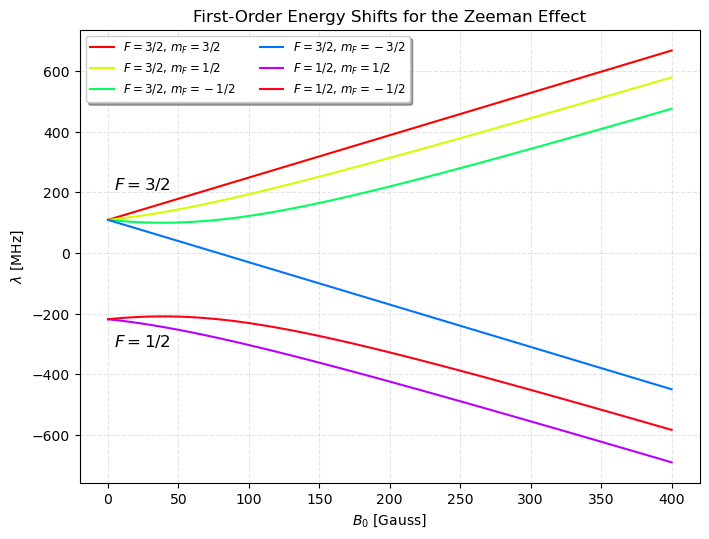

In [6]:
#Creating a colormap for the plot
colors = plt.cm.hsv(np.linspace(0 , 1, 6))

#Plotting the energy eigenvalues versus the external magnetic field
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(B0_list, energy1_list, linestyle = 'solid', color = colors[0], label = '$F=3/2$, $m_F=3/2$')
plt.plot(B0_list, energy2_list, linestyle = 'solid', color = colors[1], label = '$F=3/2$, $m_F=1/2$')
plt.plot(B0_list, energy3_list, linestyle = 'solid', color = colors[2], label = '$F=3/2$, $m_F=-1/2$')
plt.plot(B0_list, energy4_list, linestyle = 'solid', color = colors[3], label = '$F=3/2$, $m_F=-3/2$')
plt.plot(B0_list, energy5_list, linestyle = 'solid', color = colors[4], label = '$F=1/2$, $m_F=1/2$')
plt.plot(B0_list, energy6_list, linestyle = 'solid', color = colors[5], label = '$F=1/2$, $m_F=-1/2$')
plt.grid(alpha = 0.3, linestyle = 'dashed', color = 'darkgray')
plt.xlabel('$B_0$ [Gauss]')
plt.ylabel('$\u03BB$ [MHz]')
plt.title('First-Order Energy Shifts for the Zeeman Effect')
plt.legend(loc = 'upper left', ncol = 2, prop = {'size': 8.5}, shadow = True)
plt.annotate('$F=3/2$', (4, 210), weight = 'bold', size = 12)
plt.annotate('$F=1/2$', (4, -310), weight = 'bold', size = 12);